In [227]:
import pandas as pd

In [228]:
df = pd.read_csv('C:\\Users\\mojiway\\Desktop\\recom\\hotels_searches.csv')

In [229]:
input_city = 'New Delhi'

In [230]:
def searches_rank(df):
    df.loc[df.searches > 5000, 'search_ranking'] = 1000
    df.loc[(df.searches <= 5000) & (df.searches > 2000), 'search_ranking'] = 500
    df.loc[df.searches <=  2000, 'search_ranking'] = 100
    df['search_ranking'] = df['search_ranking']* 5


In [231]:
def gbv_rank(df):
    df.loc[df.GBV > 100000, 'gbv_ranking'] = 1000
    df.loc[(df.GBV <= 100000) & (df.GBV > 50000), 'gbv_ranking'] = 500
    df.loc[(df.GBV <= 50000) & (df.GBV > 10000), 'gbv_ranking'] = 200
    df.loc[df.searches <=  10000, 'gbv_ranking'] = 100
    df['gbv_ranking'] = df['gbv_ranking']* 2

In [232]:
searches_rank(df)

In [233]:
gbv_rank(df)

In [234]:
df['rank'] = df['search_ranking'] + df['gbv_ranking']

In [235]:
def city_rank(input_city):
    df.loc[df.City == input_city , 'city_ranking'] = 1
    df.loc[df.City != input_city, 'city_ranking'] = 0


In [236]:
city_rank(input_city)

In [237]:
df['rank'] = (df['search_ranking'] + df['gbv_ranking']) * df['city_ranking']

In [238]:
df.drop(['x', 'y', 'gbv_ranking','city_ranking','search_ranking','TA_score'], axis=1, inplace=True)

In [239]:
df.sort_values(by=['rank'], ascending=False)

,Hotel_ID,City,Hotel_Name,lat,lon,order_count_trivago,order_count_tripadvisor,order_count_others,Orders,RNS,GBV,searches,rank
151,178943,New Delhi,Radisson Blu Hotel New Delhi Dwarka,28.59640,77.036100,132,78,15,225,361,28166,6876,5200.0
96,180044,New Delhi,WelcomHotel Dwarka - Member ITC Hotel Group,28.57900,77.056800,196,44,17,257,385,24634,8427,5200.0
180,194285,New Delhi,"The Leela Ambience Convention Hotel, Delhi",28.66180,77.303100,79,60,19,158,264,24876,6391,5200.0
241,121718,New Delhi,Hotel The Royal Plaza,28.62180,77.217200,93,58,13,164,256,22046,5176,5200.0
115,81832,New Delhi,The LaLiT New Delhi,28.63120,77.227400,170,78,19,266,491,66804,7930,5200.0
533,150224,New Delhi,The Piccadily,28.62870,77.078700,30,32,11,72,154,11788,3189,2700.0
348,119813,New Delhi,Eros Hotel,28.55020,77.249200,97,38,11,146,245,26899,4142,2700.0
3767,210304,New Delhi,The Roseate,28.53160,77.104000,31,13,2,46,53,9549,3518,2700.0
4556,77041,New Delhi,Radisson Blu Plaza Delhi,28.54350,77.119900,26,20,10,56,74,8491,680,700.0
4534,264246,New Delhi,Pride Plaza Hotel Aerocity New Delhi,28.55250,77.122900,23,27,6,56,70,7373,694,700.0


In [240]:
df[df['City'] ==input_city].head(10)

,Hotel_ID,City,Hotel_Name,lat,lon,order_count_trivago,order_count_tripadvisor,order_count_others,Orders,RNS,GBV,searches,rank
96,180044,New Delhi,WelcomHotel Dwarka - Member ITC Hotel Group,28.5790,77.0568,196,44,17,257,385,24634,8427,5200.0
115,81832,New Delhi,The LaLiT New Delhi,28.6312,77.2274,170,78,19,266,491,66804,7930,5200.0
151,178943,New Delhi,Radisson Blu Hotel New Delhi Dwarka,28.5964,77.0361,132,78,15,225,361,28166,6876,5200.0
180,194285,New Delhi,"The Leela Ambience Convention Hotel, Delhi",28.6618,77.3031,79,60,19,158,264,24876,6391,5200.0
241,121718,New Delhi,Hotel The Royal Plaza,28.6218,77.2172,93,58,13,164,256,22046,5176,5200.0
348,119813,New Delhi,Eros Hotel,28.5502,77.2492,97,38,11,146,245,26899,4142,2700.0
533,150224,New Delhi,The Piccadily,28.6287,77.0787,30,32,11,72,154,11788,3189,2700.0
1267,81832,New Delhi,The LaLiT New Delhi,28.6312,77.2274,170,78,19,266,491,66804,1485,700.0
1520,166924,New Delhi,Radisson Blu Hotel New Delhi Paschim Vihar,28.6673,77.0912,38,28,12,77,172,14090,1221,700.0
1829,78344,New Delhi,The Imperial New Delhi,28.6256,77.2181,27,8,7,42,90,21323,1005,700.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0CC55BD0>]],
      dtype=object)

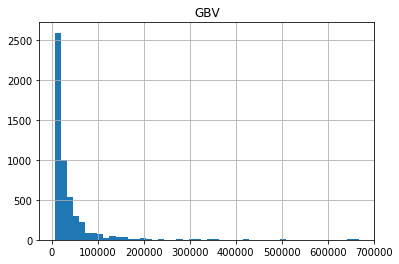

In [246]:
df.hist(column='GBV', bins=50)